In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,mean_squared_error, classification_report, f1_score, precision_score, roc_auc_score#,plot_roc_curve
from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor,
    plot_tree
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import xgboost as xgb

cosmos = pd.read_csv("neo.csv")

In [2]:
cosmos = cosmos.drop(['id','name','orbiting_body','sentry_object'], axis=1) #porzucenie kolumn
cosmos

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


In [3]:
cosmos['hazardous'] = cosmos['hazardous'].astype(int)

In [4]:
X = cosmos.drop(['hazardous'], axis=1) #stworzenie grup x,y 
y = cosmos['hazardous']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from imblearn.combine import SMOTEENN

# Setup environment
s = setup(
    data=cosmos,
    target='hazardous',
    experiment_name = 'Armagedon prediction',
    session_id=42,  # set session id for reproducibility
    train_size=0.80,  # 75% for training, 25% for testing
    #categorical_features=['est_diameter_min','OnlineSecurity', 'OnlineBackup', 'InternetService',
                          #'DeviceProtection','TechSupport','PaperlessBilling'],  # specify categorical feature columns
   # numeric_features=['tenure', 'MonthlyCharges', 'Contract'],  # specify numeric feature columns
    normalize=True,  # normalize the dataset
    normalize_method='minmax',  # normalization method
    fix_imbalance=True,  # imbalance method
    fix_imbalance_method=SMOTEENN() )# specify imbalance method

NameError: name 'setup' is not defined

In [ ]:
compare_models()

In [20]:
reg = xgb.XGBClassifier(learning_rate = 0.5, reg_lambda=1, gamma = 0.1,
                       objective='reg:squarederror',
                       n_estimators=100, max_depth=3)

reg.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='reg:squarederror', ...)

In [15]:
params={
    'learning_rate':[ 0.5],
    'gamma':[0.01, 0.1],
    'n_estimators':[100],
    'max_depth':[3,7]
}


In [16]:
grid_search=GridSearchCV(reg, params )

In [17]:
grid_search.fit(X_train_balanced, y_train_balanced)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.01,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.5, max_bi...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='reg:squarederror', ...),
             param_grid={'gamma': [0.01, 0.1], 'learning_rate': [0.5],
                         'max_depth': [3, 7], 'n_estimators': [100]})

In [18]:
print(grid_search.best_params_)

{'gamma': 0.1, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 100}


In [22]:
pred_train = reg.predict(X_train_balanced) #model.predict zwraca przynależność do klasy

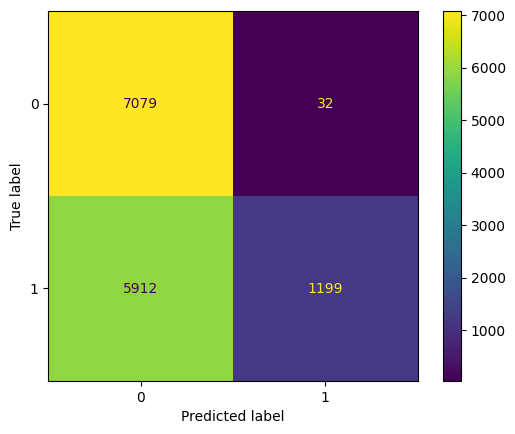

In [23]:
ConfusionMatrixDisplay.from_predictions(y_train_balanced, pred_train)

In [24]:
pred_test = reg.predict(X_test)

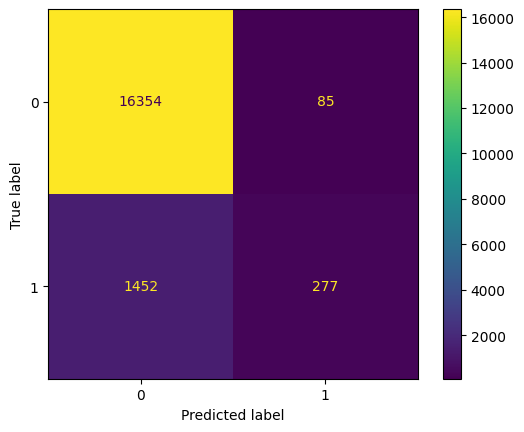

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_test)

In [26]:

print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     16439
           1       0.77      0.16      0.26      1729

    accuracy                           0.92     18168
   macro avg       0.84      0.58      0.61     18168
weighted avg       0.90      0.92      0.89     18168



In [28]:

print(classification_report(y_train_balanced, pred_train))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70      7111
           1       0.97      0.17      0.29      7111

    accuracy                           0.58     14222
   macro avg       0.76      0.58      0.50     14222
weighted avg       0.76      0.58      0.50     14222

